In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

In [3]:
utils.setNotebookConfigParams()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/khadyothan/ADA/master/heart_failure_clinical_records_dataset%20-%20heart_failure_clinical_records_dataset.csv",low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.astype('object').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


# Quantitative Variables

1. creatinine_phosphokinase

2. ejection_fraction

3. platelets

4. serum_creatinine

5. serum_sodium

## 1. Creatinine Phosphokinase w.r.t Survival Rate

<AxesSubplot:xlabel='creatinine_phosphokinase'>

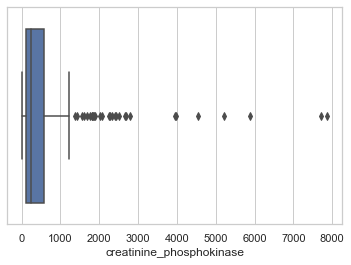

In [10]:
sns.boxplot(x = 'creatinine_phosphokinase', data = df)

In [11]:
utils.constructPxHistogram(data_frame = df, 
                           x = "creatinine_phosphokinase", 
                           color = "DEATH_EVENT",
                           marginal = "violin", 
                           hover_data=df.columns,
                           title = "Distribution of creatinine phosphokinase Levels w.r.t Death Event")


In [12]:
cpk_survived = df[df["DEATH_EVENT"] == 0]["creatinine_phosphokinase"]
cpk_not_survived = df[df["DEATH_EVENT"] == 1]["creatinine_phosphokinase"]
hist_data = [cpk_survived, cpk_not_survived]
group_labels = ['Survived', 'Not Survived']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Effect of CPK levels on Death Event",
                        colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)'])

#### <font color = Black>Data Insight 1:</font>

**1. The CPK levels for patients who did not survive the heart failure are on the higher side. Some patients show an abnormally high levels of the CPK enzyme.**

**2. There are some clear outliers (on the higher side) as it is observed in the violin histogram above. However, there very high values of CPK levels are present in both the events of SURVIVAL and DEATH.**

## 2.  Ejection Fraction w.r.t Survival Rate

<AxesSubplot:xlabel='ejection_fraction'>

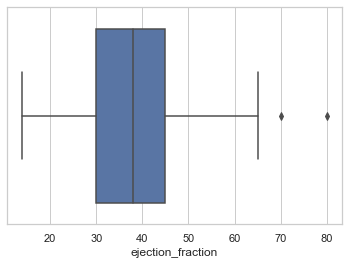

In [13]:
sns.boxplot(x = 'ejection_fraction', data = df)

In [14]:
utils.constructPxHistogram(data_frame = df, 
                           x = "ejection_fraction", 
                           color = "DEATH_EVENT",
                           marginal = "violin", 
                           hover_data=df.columns,
                           title = "Distribution of Ejection Fraction w.r.t Death Event")

In [15]:
ef_survived = df[df["DEATH_EVENT"] == 0]["ejection_fraction"]
ef_not_survived = df[df["DEATH_EVENT"] == 1]["ejection_fraction"]
hist_data = [ef_survived, ef_not_survived]
group_labels = ['Survived', 'Not Survived']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Effect of Ejection Fraction on Death Event",
                        bin_size=[2, 2],
                        colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)'])

#### <font color = black>Data Insight 2:</font>

**`1. Majority of the person who succumbed to the heart failure condition showed lower than normal ejection fraction values. Only 25-45 (%) of the blood was being pumped out of the heart.`**

## 3. Platelets w.r.t Survival Rate

<AxesSubplot:xlabel='platelets'>

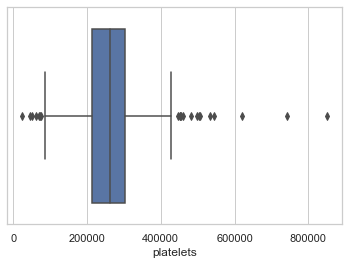

In [16]:
sns.boxplot(x="platelets", data=df)

In [17]:
utils.constructPxHistogram(data_frame = df, 
                     x = "platelets", 
                     color = "DEATH_EVENT",
                     marginal = "violin", 
                     hover_data=df.columns,
                     title = "Distribution of Platelets w.r.t Survival Rate...",)

In [18]:
platelet_survived = df[df["DEATH_EVENT"] == 0]["platelets"]
platelet_not_survived = df[df["DEATH_EVENT"] == 1]["platelets"]
hist_data = [platelet_survived, platelet_not_survived]
group_labels = ['Survived', 'Not Survived']
utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Effect of Platelet levels on Death Event",
                        bin_size=[75, 75],
                        colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)'],
                        )

Due to the high range of platelet levels, dist plot does not provide a clear picture. So we create a box plot to get a detailed analysis.

### Platelets and Death Event - Notched Box Plot

In [19]:
utils.constructNotchedBoxPlots(data_frame = df,
                               x = 'DEATH_EVENT',
                               y = 'platelets',
                               hover_name = 'DEATH_EVENT', 
                               color = 'DEATH_EVENT', 
                               title_text = 'Distribution of Platelets w.r.t Death Event',
                               )

#### <font color = Black>Data Insight 3:</font>

**`1. Majority of the person who succumbed to the heart failure condition have platelets count within the mormal range. There are a few cases of death where the platelet count hovers arund the lower boundary limit.`**

**`2. Platelet abnormalities have been well described in heart failure but the significance of platelets in contributing to the thromboembolic complications of heart failure remains uncertain.`**

**`3. There are some clear outliers as it is observed in the box plot above. These outlying values are mostly observed when the patient survived the event of a heart failure.`**

## 4. Serum Creatinine w.r.t Death Event 

<AxesSubplot:xlabel='serum_creatinine'>

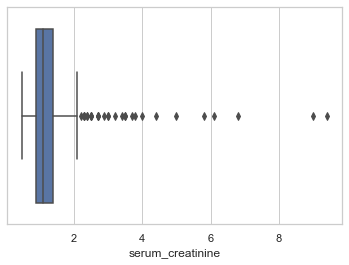

In [20]:
sns.boxplot(x = 'serum_creatinine', data = df)

In [21]:
utils.constructPxHistogram(data_frame = df, 
                           x = "serum_creatinine", 
                           color = "DEATH_EVENT",
                           marginal = "violin", 
                           hover_data=df.columns,
                           title = "Distribution of Serum Creatinine Levels w.r.t Death Event", 
                           )

### Serum Creatinine Dist Plot

In [22]:
serum_creatinine_survived = df[df["DEATH_EVENT"] == 0]["serum_creatinine"]
serum_creatinine_not_survived = df[df["DEATH_EVENT"] == 1]["serum_creatinine"]
hist_data = [serum_creatinine_survived, serum_creatinine_not_survived]
group_labels = ['Survived', 'Not Survived']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Effect of Serum Creatinine on Death Event",
                        bin_size=[0.2, 0.2],
                        colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)'],
                        )

#### <font color = black>Data Insight 4:</font>

**`1. Of the entire population being studied, there are 96 cases who have succumbed to the heart failure condition. Out of these 96 cases, 87 cases have reported serum levels either around the higher boundary limit or higher than the normal range.`**

**`2. Some cases with much elevated levels of serum creatinine survived the heart failure condition.`**

**`3. Of the entire population 72.9% cases have reported elevated levels of blood serum. While 27.1% cases have serum levels in the normal range.`**

**`4. Out of the 72.9% that have reported high serum levels, 43.8% cases survived the heart failure condition while the remaining 29.1% succumbed to the condition.`**

**`5. Of the cases that have serum levels in the acceptable range 24.1% cases survived the heart failure condition while a very small number of 3.01% cases succumbed to the condition.`**

## 5. Serum Sodium w.r.t Survival Rate 

<AxesSubplot:xlabel='serum_sodium'>

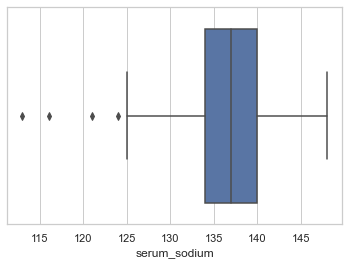

In [23]:
sns.boxplot(x = 'serum_sodium', data = df)

In [24]:
utils.constructPxHistogram(data_frame = df, 
                     x = "serum_sodium", 
                     color = "DEATH_EVENT",
                     marginal = "violin", 
                     hover_data=df.columns,
                     title = "Distribution of Serum Sodium Levels and Survival Rate...", 
                     )

### Serum Sodium Dist Plot

In [25]:
# total survived and death cases w.r.t overall sodium level distribution
serum_sodium_survived = df[df["DEATH_EVENT"] == 0]["serum_sodium"]
serum_sodium_not_survived = df[df["DEATH_EVENT"] == 1]["serum_sodium"]
hist_data = [serum_sodium_survived, serum_sodium_not_survived]
group_labels = ['Survived', 'Not Survived']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Serum Sodium Levels v/s. Survival Rate",
                        bin_size=[0.2, 0.2],
                        colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)'],
                        )

#### <font color = Black>Data Insight 5:</font>

**`1. Of the entire population being studied, there are 96 cases who have succumbed to the heart failure condition. Out of these 96 cases, 59 cases have reported lower than normal sodium levels. This observation is inline with the research studies cited.`**

**`2. Of the entire population 46.5% cases have reported lower levels of blood sodium levels. While 53.5% cases have serum levels in the acceptable range.`**

**`3. Out of the 46.5% that have reported low sodium levels, 26.8% cases survived the heart failure condition while the remaining 19.7% succumbed to the condition.`**

**`4. Of the cases that have sodium levels in the acceptable range, 41.1% cases survived the heart failure condition while a very small number of 12.4% cases succumbed to the condition.`**

## 1. Univariate Analysis of Categorical variables

1. anaemia
2. high_blood_pressure
3. diabetes 
4. sex
5. smoking
6. DEATH_EVENT

**The analysis for DEATH_EVENT column is done at the end of the notebook.**

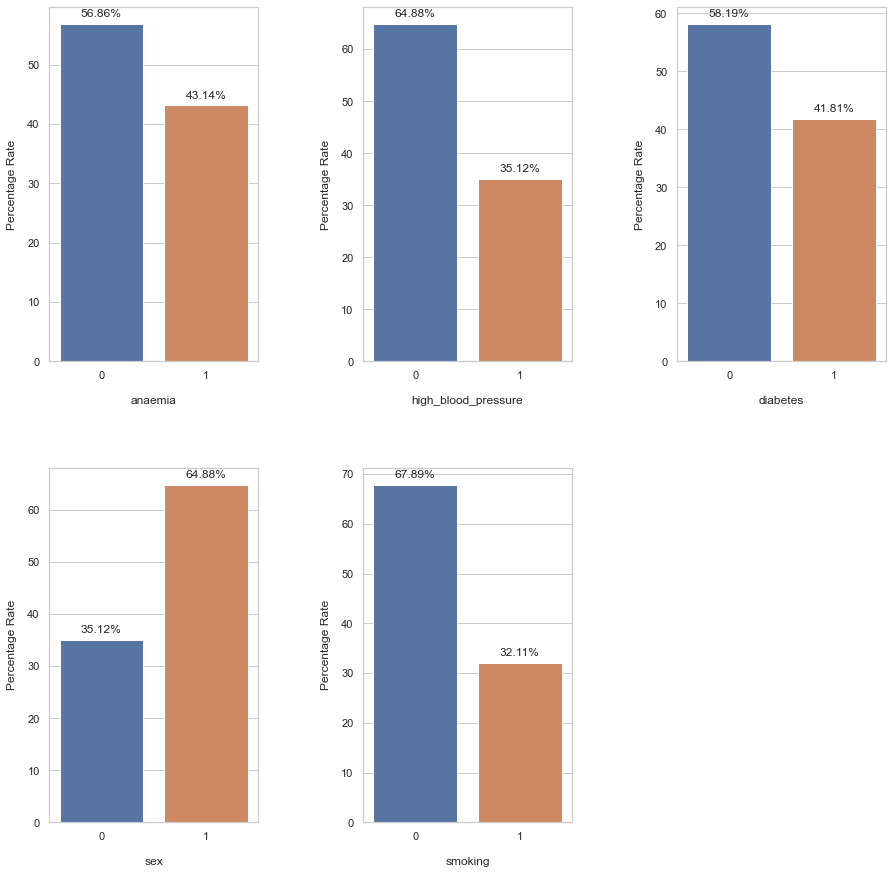

In [26]:
category_list = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']

utils.plotUnivariateAnalysis(data_frame = df, 
                             category_list = category_list, 
                             rows = 2, 
                             cols = 3,
                             figsize = (15, 15))

#### <font color = brown>Data Insight 1:</font>

**`1. ~57% of the population under study have aneamic symptoms while ~43% are non-aneamic.`**

**`2. ~65% of the population have hypertension or high bloob pressure while ~35% have normal blood pressure.`**

**`3. ~58% of the population are diabetic while ~42% are non-diabetic.`**

**`4. ~65% of the population are male while ~35% are female.`**

**`5. ~68% of the population have smoking habits while ~32% are non-smokers.`**

## 2. Distribution of Age

In [27]:
hist_data = [df["age"].values]
group_labels = ['age']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Distribution of Age",
                        bin_size = [2, 2],
                        colors = ['rgb(0, 100, 0)'],
                        )

#### <font color = brown>Data Insight 2:</font>

**`1. The age group of people ranges from 40 - 95 with visible spike in the population density at certain age intervals around  [44-46], [50-52], [60-62] (highest density), [64-66], [70-72].`**

## 3. Distribution of Age w.r.t Gender

In [28]:
utils.constructNotchedBoxPlots(data_frame = df,
                               x = 'sex',
                               y = 'age',
                               hover_name = 'sex', 
                               color = 'sex', 
                               title_text = 'Distribution of Age, Gender Wise - Male: 1, Female: 0',
                               )

#### <font color = brown>Data Insight 3:</font>

**`1. The minimum age is 40 for both Males and Female.`**

**`2. The maximum age is 95 for Male population and for female population the maximum age is 90 for the population being studied.`** 

## 4. Effect of Age on Survival Rate

In [29]:
survived = df[df["DEATH_EVENT"] == 0]["age"]
not_survived = df[df["DEATH_EVENT"] == 1]["age"]

In [30]:
hist_data = [survived, not_survived]
group_labels = ['Survived', 'Not Survived']

utils.constructDistPlot(hist_data = hist_data, 
                        group_labels = group_labels, 
                        title_text = "Effect of Age on the Survival Rate",
                        bin_size = [1, 1],
                        )

#### <font color = brown>Data Insight 4:</font>

**`1. The survival rate is more within the age group 50 to 70.`**

**`2. The chances of not surviving the event of a heart failure happens around all the age group in the population being studied. This is highest around the 60's age group. Above the age of 80, the chances of survival decreases drsatically.`**

**`3. The above numbers could be mostly due the lifestyle and the eating habits of the population. A better active lifestyle would increase the chances of surviving the event of a hheart failure.`**

## 5. Survival Rate w.r.t Gender

In [31]:
male = df[df["sex"] == 1]
female = df[df["sex"] == 0]

male_survived = male[df["DEATH_EVENT"] == 0]
male_not_survived = male[df["DEATH_EVENT"] == 1]
female_survived = female[df["DEATH_EVENT"] == 0]
female_not_urvived = female[df["DEATH_EVENT"] == 1]

In [32]:
labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not_survived), len(female_survived),len(female_not_urvived)]

utils.ConstructGoPieChart(labels = labels, 
                          values = values, 
                          title_text="Survival Rate w.r.t Gender", 
                          )

#### <font color = brown>Data Insight 5:</font>

**`1. From the above pie chart it is evident that 44.1% (132) of the male population have survived while 20.7% (62) succumbed to the heart failure.`**

**`2. Coming to the female population, 23.7% (71) of the population survived the heart failure while 11.4% (34) succumbed to the heart failure.`**

## 6. Effect of High Blood Pressure (Hypertension) on Survival Rate

In [33]:
hypertension_yes = df[df['high_blood_pressure']==1]
hypertension_no = df[df['high_blood_pressure']==0]

hypertension_yes_survived = hypertension_yes[df["DEATH_EVENT"] == 0]
hypertension_yes_not_survived = hypertension_yes[df["DEATH_EVENT"] == 1]
hypertension_no_survived = hypertension_no[df["DEATH_EVENT"] == 0]
hypertension_no_not_survived = hypertension_no[df["DEATH_EVENT"] == 1]

In [34]:
labels = [["Hypertension YES","Hypertension NO"], 
          ['Hypertension YES - Survived','Hypertension  YES - Not Survived', 'Hypertension NO - Survived',
           'Hypertension  NO - Not Survived']]

values = [[len(hypertension_yes), len(hypertension_no)],
         [len(hypertension_yes_survived), len(hypertension_yes_not_survived),
          len(hypertension_no_survived), len(hypertension_no_not_survived)]]

subplot_titles = ['Hypertension Distribution', 'Hypertension & SR']
sub_plot_names = ["Distribution of Hypertension", 'Hypertension & Survival']

utils.ConstructGoPieChart(build_sub_plots = True, 
                          rows = 1, 
                          cols = 2, 
                          subplot_titles = subplot_titles,
                          labels = labels, 
                          values = values, 
                          sub_plot_names = sub_plot_names,
                          title_text = "Hypertension & Survival Rate",
                          )

#### <font color = brown>Data Insight 6:</font>

**`1. Out of the total population, around 35% of then suffer of high blood pressure or hypertension.`**

**`2. Amongst these 35% population, 22% survived the event of a heart failure while 13% succumbed to the condition.`**

**`3. Amongst the 65% population that do not have hypertension, 45.8% survived the event of a heart failure while 19% succumbed to the condition.`**

## 7. Effect of Diabetes on Survival Rate

In [35]:
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]

diabetes_yes_survived = diabetes_yes[df["DEATH_EVENT"] == 0]
diabetes_yes_not_survived = diabetes_yes[df["DEATH_EVENT"] == 1]
diabetes_no_survived = diabetes_no[df["DEATH_EVENT"] == 0]
diabetes_no_not_survived = diabetes_no[df["DEATH_EVENT"] == 1]

In [36]:
labels = [["Diabetes YES", "Diabetes NO"], 
          ['Diabetes YES - Survived','Diabetes  YES - Not Survived', 'Diabetes NO - Survived',
           'Diabetes  NO - Not Survived']]

values = [[len(diabetes_yes), len(diabetes_no)],
         [len(diabetes_yes_survived), len(diabetes_yes_not_survived),
          len(diabetes_no_survived), len(diabetes_no_not_survived)]]

subplot_titles = ['Diabetes Distribution', 'Diabetes and Survival Rate']
sub_plot_names = ["Distribution of Diabetes", 'Diabetes & Survival']

utils.ConstructGoPieChart(build_sub_plots = True, 
                          rows = 1, 
                          cols = 2, 
                          subplot_titles = subplot_titles,
                          labels = labels, 
                          values = values, 
                          sub_plot_names = sub_plot_names, 
                          title_text = "Diabetes & Survival Rate",
                          )

#### <font color = brown>Data Insight 7:</font>

**`1. Out of the total population, ~42% of the people have deibetes while ~58% do not have diabetes. `**

**`2. Of the people who have deibetes, 28.4% of the population survived the event of a heart failure while 13.4% people succumbed to the condition.`**

**`3. Of the people who do not have deibetes, 39.5% of the population survived the event of a heart failure while 18.7% people succumbed to the condition.`**

## 8. Effect of Smoking on Survival Rate

In [37]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

smoking_yes_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 0]
smoking_yes_not_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 1]
smoking_no_survived = smoking_no[smoking_no["DEATH_EVENT"] == 0]
smoking_no_not_survived = smoking_no[smoking_no["DEATH_EVENT"] == 1]

In [38]:
labels = [["Smoking YES", "Smoking NO"], 
          ['Smoking YES - Survived','Smoking  YES - Not Survived', 'Smoking NO - Survived',
           'Smoking  NO - Not Survived']]

values = [[len(smoking_yes), len(smoking_no)],
         [len(smoking_yes_survived), len(smoking_yes_not_survived),
          len(smoking_no_survived), len(smoking_no_not_survived)]]

subplot_titles = ['Smoking Distribution', 'Smoking and Survival Rate']
sub_plot_names = ["Distribution of Smoking", 'Smoking & Survival']

utils.ConstructGoPieChart(build_sub_plots = True, 
                          rows = 1, 
                          cols = 2, 
                          subplot_titles = subplot_titles,
                          labels = labels, 
                          values = values, 
                          sub_plot_names = sub_plot_names, 
                          title_text = "Smoking & Survival Rate",
                          )

#### <font color = brown>Data Insight 8:</font>

**`1. Out of the total population, ~32% of the people have smoking habits while ~68% do not have any smoking habits. `**

**`2. Of the people who smoke, 22.1% of the population survived the event of a heart failure while 10% people succumbed to the condition.`**

**`3. Of the people who do not have smoking habits, 45.8% of the population survived the event of a heart failure while 22.1% people succumbed to the condition.`**

## 9. Effect of Anaemia on Survival Rate

In [39]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

anaemia_yes_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 0]
anaemia_yes_not_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 1]
anaemia_no_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 0]
anaemia_no_not_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 1]

In [40]:
labels = [["Anaemia YES", "Anaemia NO"], 
          ['Anaemia YES - Survived','Anaemia  YES - Not Survived', 'Anaemia NO - Survived',
           'Anaemia  NO - Not Survived']]

values = [[len(anaemia_yes), len(anaemia_no)],
         [len(anaemia_yes_survived), len(anaemia_yes_not_survived),
          len(anaemia_no_survived), len(anaemia_no_not_survived)]]

subplot_titles = ['Anaemia Distribution', 'Anaemia and Survival Rate']
sub_plot_names = ["Distribution of Anaemia", 'Anaemia & Survival']

utils.ConstructGoPieChart(build_sub_plots = True, 
                          rows = 1, 
                          cols = 2, 
                          subplot_titles = subplot_titles,
                          labels = labels, 
                          values = values, 
                          sub_plot_names = sub_plot_names, 
                          title_text = "Anaemia & Survival Rate",
                          )

#### <font color = brown>Data Insight 9:</font>

**`1. Out of the total population, ~43.1% of the people have Anaemia observed while ~56.9% do not have any Anaemia synmtoms. `**

**`2. Of the people who have anaemia, 27.8% of the population survived the event of a heart failure while 15.4% people succumbed to the condition.`**

**`3. Of the people who do not have anaemia, 40.1% of the population survived the event of a heart failure while 16.7% people succumbed to the condition.`**

## Distribution of DEATH_EVENTS

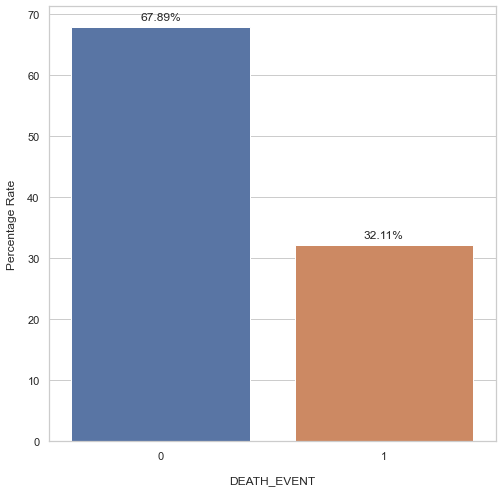

In [41]:
utils.plotUnivariateAnalysis(data_frame = df, 
                             category_list = ['DEATH_EVENT'], 
                             rows = 1, 
                             cols = 1, 
                             figsize = (8, 8))

#### <font color = Black>Data Insight:</font>

**`1. In the population being studied for the condition of heart failure out of the 299 cases, 96 have succumbed to the condition while 203 cases survived.`**

**`2. In percentages, 32.11% of the cases succumbed (positive examples) while 67.89% cases survived (negative examples) the condition.`**

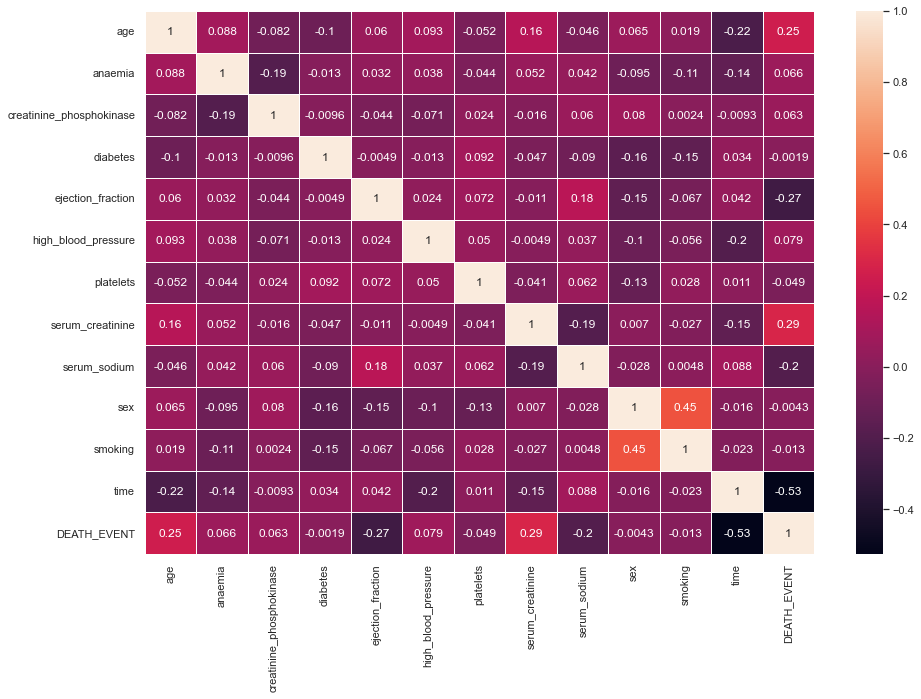

In [42]:
data_feature_correlation_matrix = utils.plotDataCorrelationHeatMap(df)

In [43]:
data_feature_correlation_matrix[abs(data_feature_correlation_matrix['DEATH_EVENT']) > 0.2]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

#### <font color = Black>Data Insight:</font>

**`1. The Correlation matrix shows the correlation among the features and their correlation with the DEATH_EVENT.`**

**`2. Five features - 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'time' seem to be the most correlated to the death event when compared to the other features.`**

In [47]:
#PCA

In [120]:
# Without PCA

In [129]:
from sklearn.model_selection import train_test_split

In [230]:
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [231]:
xtrain, xtest, ytrain, ytest = train_test_split(
        X, y, test_size = 0.25, random_state = 0)

In [132]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

[[-1.3679055   1.12366644 -0.51861616  1.14423702 -1.12754015 -0.77459667
  -0.33266733 -0.59738073 -0.32809567  0.74535599 -0.66022529  1.31786894]
 [ 1.80097544  1.12366644  0.29392003  1.14423702  1.03412532  1.29099445
   0.54025274 -0.3846241   1.83985213 -1.34164079 -0.66022529 -1.2935039 ]
 [ 0.77323027  1.12366644 -0.52582497 -0.87394481  1.89879151 -0.77459667
  -0.11443731 -0.27824578 -0.11130089 -1.34164079 -0.66022529 -0.57537637]
 [ 0.25935769  1.12366644 -0.52273548 -0.87394481  1.89879151 -0.77459667
   0.42121819  0.14726748 -0.32809567 -1.34164079 -0.66022529  0.58668455]
 [ 1.20145743 -0.88994382  0.01277633 -0.87394481  0.16945913 -0.77459667
  -0.03152945 -0.19314313  0.10549389  0.74535599 -0.66022529 -0.28812536]
 [ 0.34500312  1.12366644 -0.47021413  1.14423702  1.89879151  1.29099445
  -0.63025371 -0.49100241  0.75587823 -1.34164079 -0.66022529 -0.45786459]
 [ 0.43064855  1.12366644 -0.51243717 -0.87394481  0.16945913  1.29099445
  -0.24339141 -0.17186747 -0.544

In [133]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [134]:
y_pred = classifier.predict(xtest)

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[44  4]
 [13 14]]


In [136]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.7733333333333333


In [232]:
#Variance Inflation Factor(VIF) Calculation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_info

,VIF
0,29.114744
1,1.909994
2,1.448473
3,1.789419
4,12.081364
5,1.646044
6,8.641813
7,2.919913
8,59.151991
9,3.795155


In [137]:
#With PCA

In [138]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [244]:
X_train

array([[ 9.40456198e-01,  2.32262798e+00,  1.44840795e-01],
       [-4.31633979e-02,  2.15566909e+00, -2.77286214e-01],
       [-1.03214562e+00,  9.33628460e-01, -4.81324772e-01],
       [-1.32674669e+00,  1.97764071e+00,  5.20286355e-01],
       [-1.27194567e+00,  8.33450172e-01, -7.13393420e-01],
       [-4.58600724e-01,  1.68268975e+00, -4.12797443e-01],
       [-1.18497838e+00, -7.54205100e-01, -1.97520015e+00],
       [ 8.91581820e-01,  1.71977826e+00,  6.55396050e-02],
       [ 7.48831678e-01, -2.14540231e+00, -6.99411489e-01],
       [ 7.94003575e-01, -5.06021315e-03,  1.09277237e+00],
       [-4.49270636e-01, -1.03138091e+00,  1.51884261e-03],
       [ 1.21028741e+00,  1.42718209e+00,  4.43184747e-01],
       [-7.68050783e-01, -6.33148871e-02,  4.26052276e-01],
       [ 1.09346592e+00,  8.26505863e-02, -5.40934589e-01],
       [ 1.58525480e+00,  4.19306632e-01, -1.15184206e+00],
       [-8.29301990e-01,  2.45759484e-01,  1.63420792e+00],
       [-6.46333983e-01, -2.51226396e+00

In [234]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [235]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [236]:
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [237]:
y_pred = classifier.predict(X_test)

In [238]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

In [239]:
cm

array([[36,  1],
       [12, 11]], dtype=int64)

In [243]:
X_train

array([[ 9.40456198e-01,  2.32262798e+00,  1.44840795e-01],
       [-4.31633979e-02,  2.15566909e+00, -2.77286214e-01],
       [-1.03214562e+00,  9.33628460e-01, -4.81324772e-01],
       [-1.32674669e+00,  1.97764071e+00,  5.20286355e-01],
       [-1.27194567e+00,  8.33450172e-01, -7.13393420e-01],
       [-4.58600724e-01,  1.68268975e+00, -4.12797443e-01],
       [-1.18497838e+00, -7.54205100e-01, -1.97520015e+00],
       [ 8.91581820e-01,  1.71977826e+00,  6.55396050e-02],
       [ 7.48831678e-01, -2.14540231e+00, -6.99411489e-01],
       [ 7.94003575e-01, -5.06021315e-03,  1.09277237e+00],
       [-4.49270636e-01, -1.03138091e+00,  1.51884261e-03],
       [ 1.21028741e+00,  1.42718209e+00,  4.43184747e-01],
       [-7.68050783e-01, -6.33148871e-02,  4.26052276e-01],
       [ 1.09346592e+00,  8.26505863e-02, -5.40934589e-01],
       [ 1.58525480e+00,  4.19306632e-01, -1.15184206e+00],
       [-8.29301990e-01,  2.45759484e-01,  1.63420792e+00],
       [-6.46333983e-01, -2.51226396e+00

In [240]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


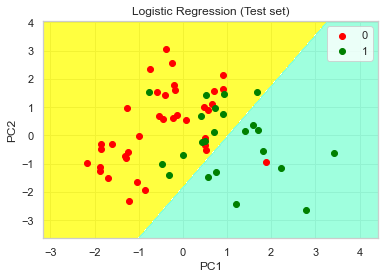

In [147]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


In [150]:
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(y_test, y_pred)

0.7666666666666667

In [171]:
# LDA

In [172]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(df.drop(columns=["DEATH_EVENT"]), df["DEATH_EVENT"])

lda_df = pd.DataFrame(lda.transform(df.drop(columns=["DEATH_EVENT"])))

lda_df["DEATH_EVENT"] = df["DEATH_EVENT"]
print(lda_df.head())

          0  DEATH_EVENT
0  2.863089            1
1  2.223360            1
2  2.399034            1
3  1.973079            1
4  3.646093            1


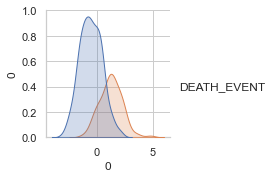

In [174]:
sns.pairplot(lda_df, hue="DEATH_EVENT")

Confusion Matrix:
[[34  1]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

ROC_AUC Score: 0.7857142857142857


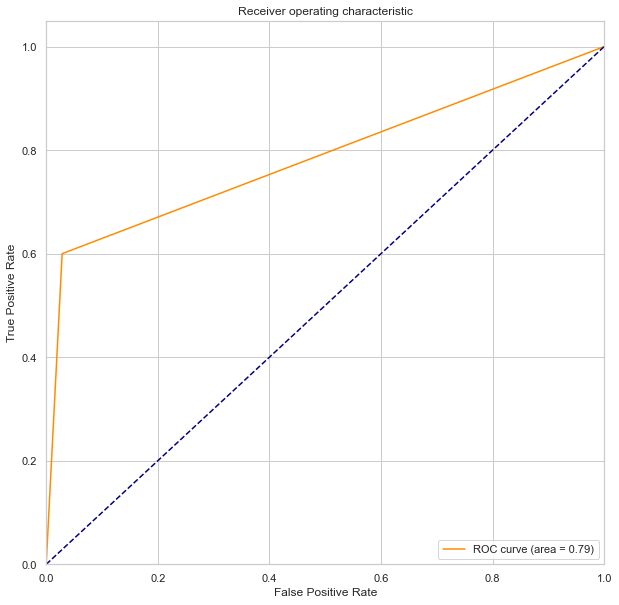

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lda_df.drop(columns=["DEATH_EVENT"]), lda_df["DEATH_EVENT"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [179]:
#SVM

In [180]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [181]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

In [182]:
utils.setNotebookConfigParams()

In [186]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = 'D:/Khadyu/3-2 Spring/ADA/Project/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [198]:
# X = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 
# 'creatinine_phosphokinase', 'time']]

# X = heart_faliure_data[['age', 'time','ejection_fraction','serum_creatinine', 'serum_sodium']] 

# X = heart_faliure_data[['ejection_fraction', 'serum_creatinine']]

X = heart_faliure_data[['time','ejection_fraction','serum_creatinine']]

# X = heart_faliure_data[['age','ejection_fraction','serum_sodium']]

y = heart_faliure_data[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, test_size = 0.15, random_state = 2)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (254, 3)
Y_Train Shape: (254, 1)
X_Test Shape: (45, 3)
Y_Test Shape: (45, 1)


In [188]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({0: 171, 1: 83})


In [189]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(342, 3)
(342, 1)


In [190]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))
print('Resampled dataset shape %s' % Counter(y_train_resampled.values.ravel()))
print('Test dataset shape %s' % Counter(y_test.values.ravel()))

Original dataset shape Counter({0: 171, 1: 83})
Resampled dataset shape Counter({1: 171, 0: 171})
Test dataset shape Counter({0: 32, 1: 13})


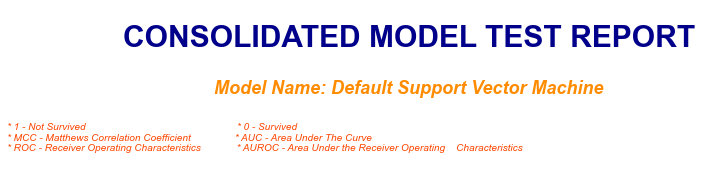

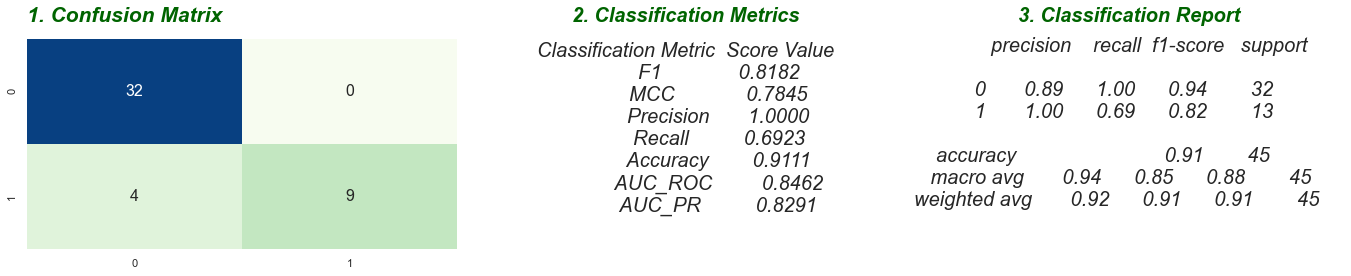

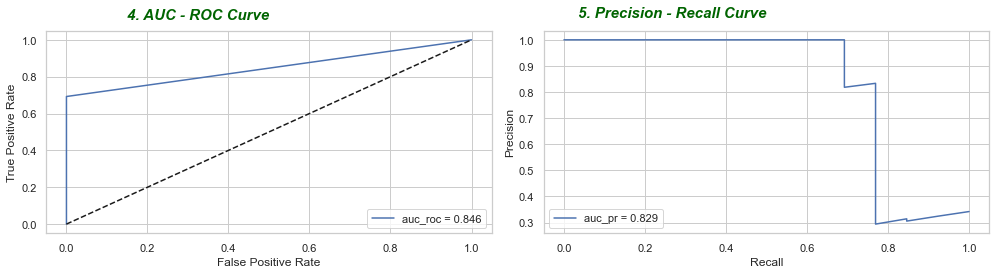

In [191]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train.values, y_train.values.ravel())


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(svm, X_test, y_test, model_name="Default Support Vector Machine")

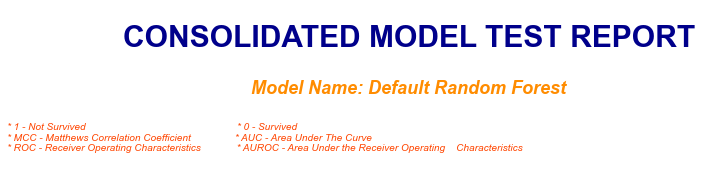

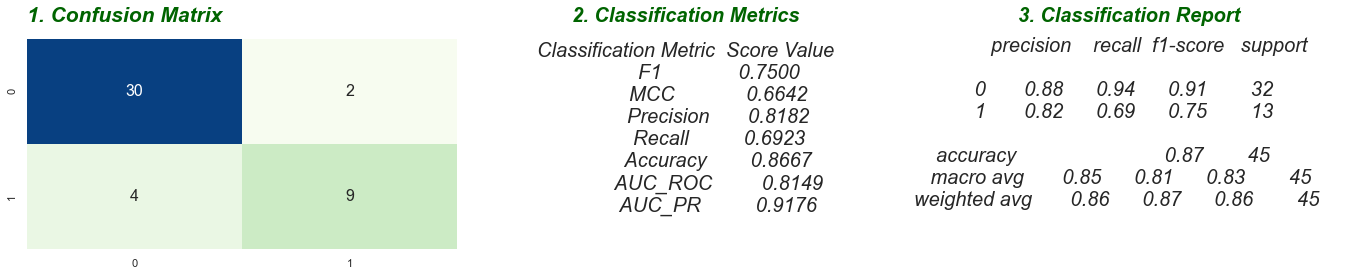

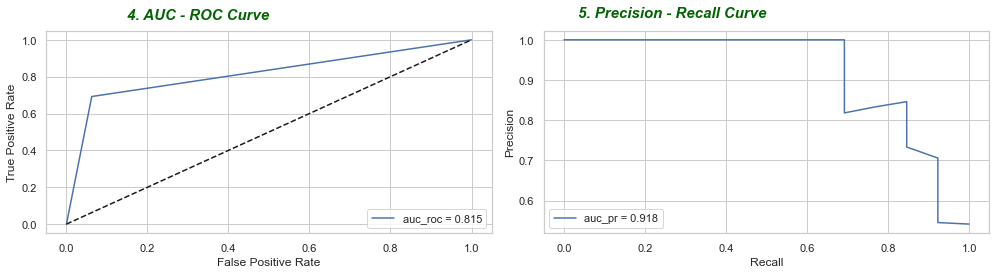

In [192]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Default Random Forest")

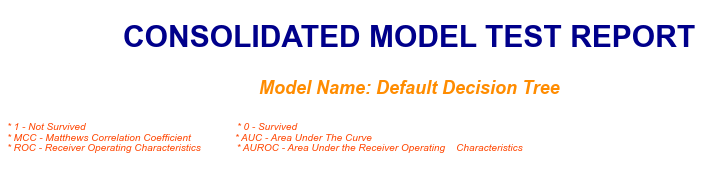

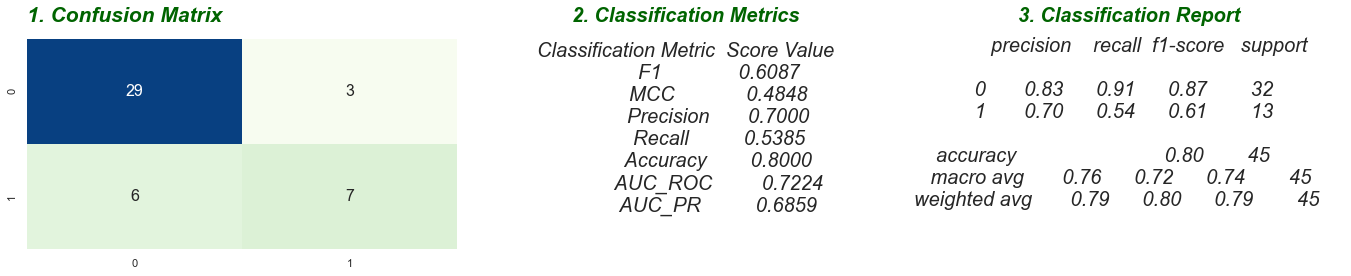

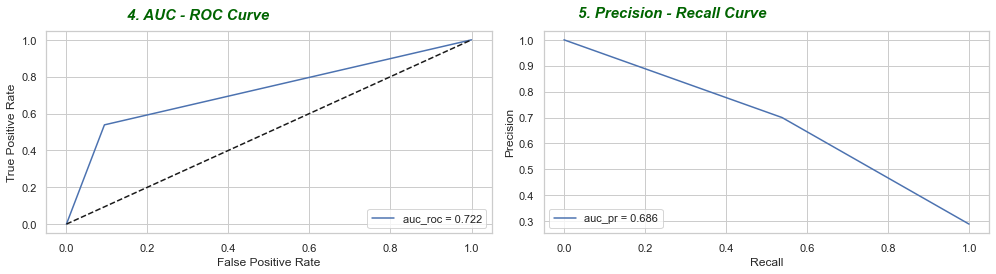

In [199]:
# Decision Tree with Default Parameters
# X = df.iloc[:, 0:12].values
# y = df.iloc[:, 12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, test_size = 0.15, random_state = 2)
tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision Tree")

In [204]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [215]:
from sklearn import tree
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, test_size = 0.15, random_state = 2)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [216]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0], dtype=int64)

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.73      0.85      0.79        13

    accuracy                           0.87        45
   macro avg       0.83      0.86      0.84        45
weighted avg       0.88      0.87      0.87        45



,VIF
0,29.114744
1,1.909994
2,1.448473
3,1.789419
4,12.081364
5,1.646044
6,8.641813
7,2.919913
8,59.151991
9,3.795155


In [229]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
